##Importing the Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc
)
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA

##Importing the Dataset

In [ ]:
# Importing the dataset
train = pd.read_csv("optdigits.tra", header=None)
test = pd.read_csv("optdigits.tes", header=None)

## Feature Cleaning and Scaling

In [ ]:
# Feature Cleaning and Scaling
X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

##Plotting Functions

In [ ]:
# Store all results for summary table
results = []

# Plotting Functions
def plot_confusion_matrix(y_true, y_pred, title):
    """
    Generates a heatmap of the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def plot_learning_curve(estimator, X, y, title):
    """
    Generates a learning curve plot.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

def plot_roc_curve_multiclass(estimator, X_test, y_test, title):
    """
    Generates multiclass ROC curve and AUC.
    """
    n_classes = len(np.unique(y_test))
    y_score = estimator.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=list(range(n_classes)))

    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

##Training the model and plotting graphs

Random Forest Classifier Experimentation on Original Feature Set

===== Random Forest Classifier (Estimators: 100, Max Depth: 10) =====
Accuracy: 0.9683
Precision: 0.9689
Recall: 0.9683
F-score: 0.9684
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.96      0.99      0.98       182
           2       1.00      0.98      0.99       177
           3       0.97      0.96      0.96       183
           4       0.98      0.98      0.98       181
           5       0.98      0.97      0.98       182
           6       0.99      0.98      0.99       181
           7       0.98      0.93      0.95       179
           8       0.92      0.94      0.93       174
           9       0.91      0.96      0.93       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797



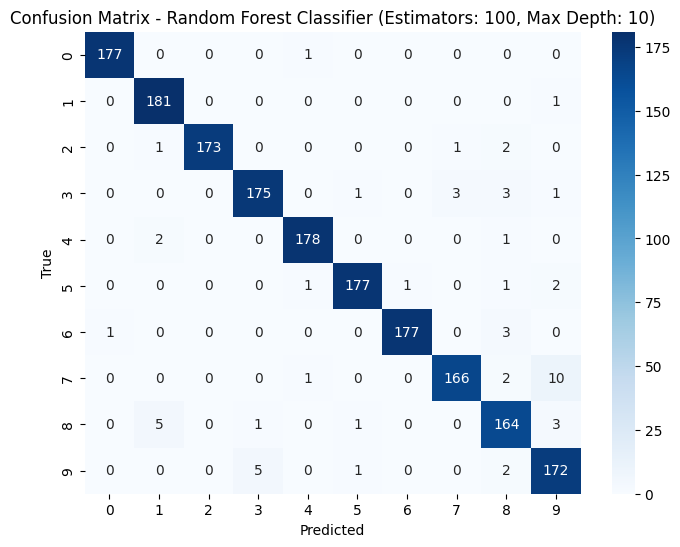

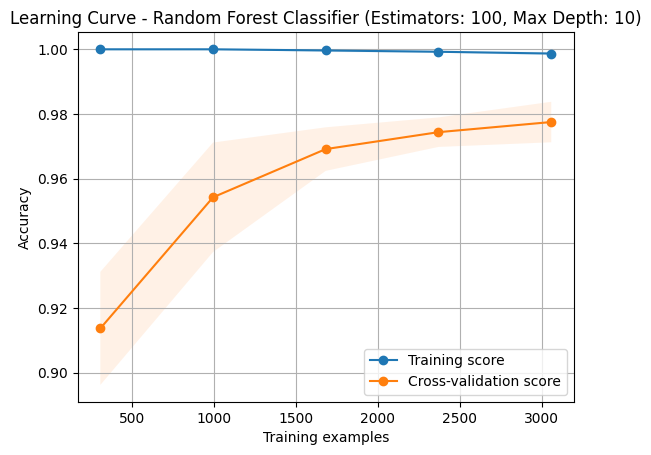

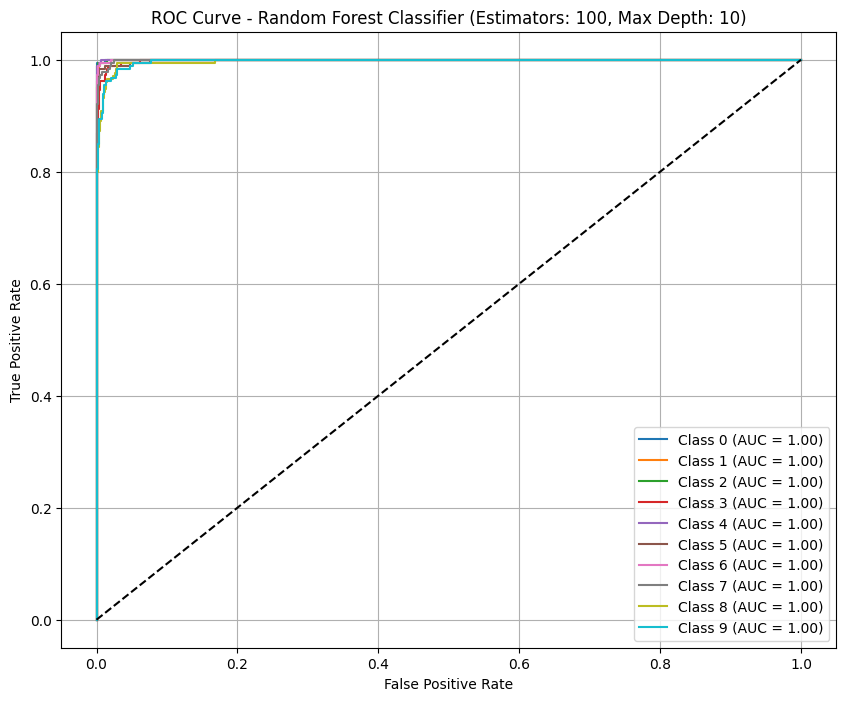

In [ ]:
# --- Random Forest Classifier Experimentation ---
print("Random Forest Classifier Experimentation on Original Feature Set\n")

# Best hyperparameters for a single run
n_estimators = 100
max_depth = 10

name = f"Random Forest Classifier (Estimators: {n_estimators}, Max Depth: {max_depth})"
print(f"===== {name} =====")

# Initialize and train the Random Forest model with the chosen hyperparameters
model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)

# Train the model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Generate and print classification report and confusion matrix
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F-score: {f1:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save results
results.append({
    "Classifier": "Random Forest",
    "Accuracy": acc,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1,
    "PCA": "No"
})

# Plots for the original feature set
plot_confusion_matrix(y_test, y_pred, name)
plot_learning_curve(model, X_train_scaled, y_train, name)
plot_roc_curve_multiclass(model, X_test_scaled, y_test, name)

## Plotting graphs after applying PCA


Random Forest Classifier Experimentation with PCA

Number of PCA components: 41

===== Random Forest Classifier (PCA) (Estimators: 100, Max Depth: 10) =====
Accuracy: 0.9566
Precision: 0.9570
Recall: 0.9566
F-score: 0.9564
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       0.90      0.96      0.93       182
           2       0.99      0.95      0.97       177
           3       0.97      0.93      0.95       183
           4       0.99      0.99      0.99       181
           5       0.96      0.97      0.96       182
           6       0.97      0.99      0.98       181
           7       0.95      0.98      0.96       179
           8       0.93      0.85      0.89       174
           9       0.93      0.94      0.93       180

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96     

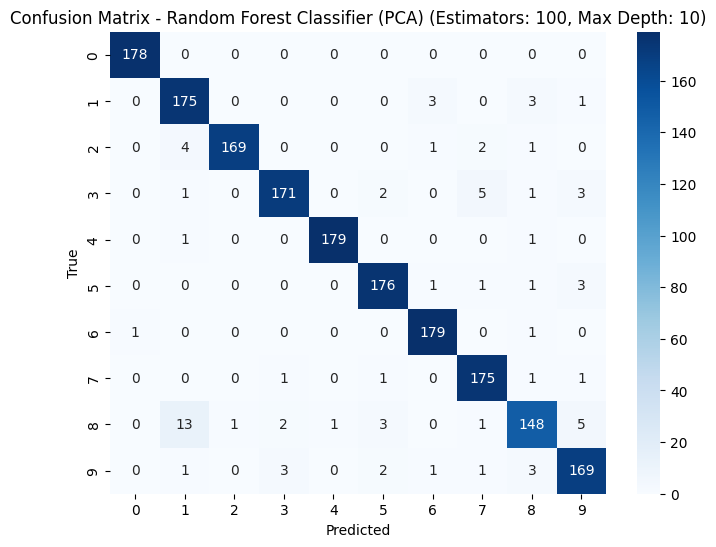

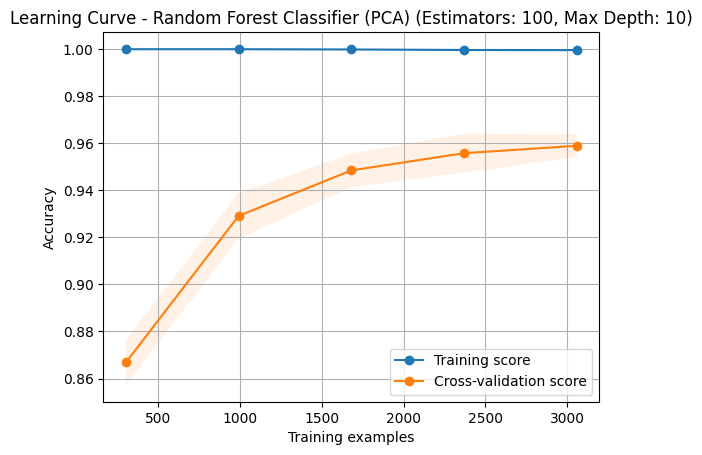

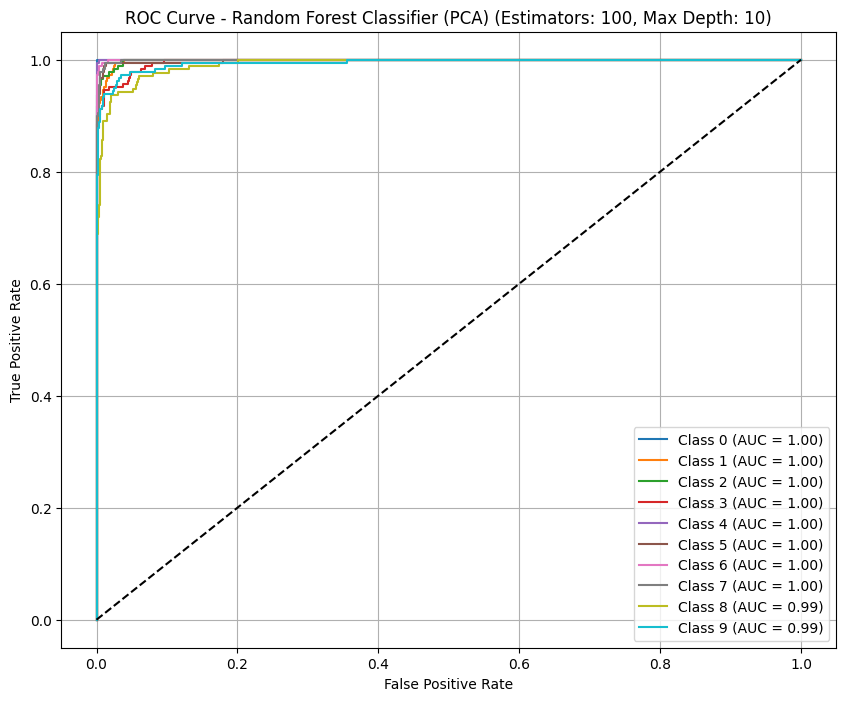

In [ ]:
# --- PCA for Feature Dimensionality Reduction ---
print("\nRandom Forest Classifier Experimentation with PCA\n")

# Apply PCA with 95% variance explained
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(f"Number of PCA components: {pca.n_components_}")

# Re-run Random Forest classifier with the same hyperparameters on PCA-transformed data
name_pca = f"Random Forest Classifier (PCA) (Estimators: {n_estimators}, Max Depth: {max_depth})"
print(f"\n===== {name_pca} =====")

# Initialize and train the Random Forest model on PCA-transformed data
model_pca = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    random_state=42,
    n_jobs=-1
)

# Train the model
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

# Generate and print classification report and confusion matrix
acc_pca = accuracy_score(y_test, y_pred_pca)
report_pca = classification_report(y_test, y_pred_pca, output_dict=True)
precision_pca = report_pca['weighted avg']['precision']
recall_pca = report_pca['weighted avg']['recall']
f1_pca = report_pca['weighted avg']['f1-score']

print(f"Accuracy: {acc_pca:.4f}")
print(f"Precision: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F-score: {f1_pca:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_pca))

# Save results
results.append({
    "Classifier": "Random Forest",
    "Accuracy": acc_pca,
    "Precision": precision_pca,
    "Recall": recall_pca,
    "F1-score": f1_pca,
    "PCA": "Yes"
})

# Plots for the PCA-transformed feature set
plot_confusion_matrix(y_test, y_pred_pca, name_pca)
plot_learning_curve(model_pca, X_train_pca, y_train, name_pca)
plot_roc_curve_multiclass(model_pca, X_test_pca, y_test, name_pca)

##Summary

In [ ]:
# --- Summary table ---
results_df = pd.DataFrame(results)
print("\n=== Performance Summary ===\n")
print(results_df)


=== Performance Summary ===

      Classifier  Accuracy  Precision    Recall  F1-score  PCA
0  Random Forest  0.968280   0.968888  0.968280  0.968393   No
1  Random Forest  0.956594   0.956996  0.956594  0.956421  Yes
